<a href="https://colab.research.google.com/github/nilavya2000/Time_Series_decomposition/blob/main/time-series-decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

plt.style.use('ggplot')
rcParams['figure.figsize'] = [12,9]


In [2]:
meat = pd.read_csv( "https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv", parse_dates=["date"], index_col="date")
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


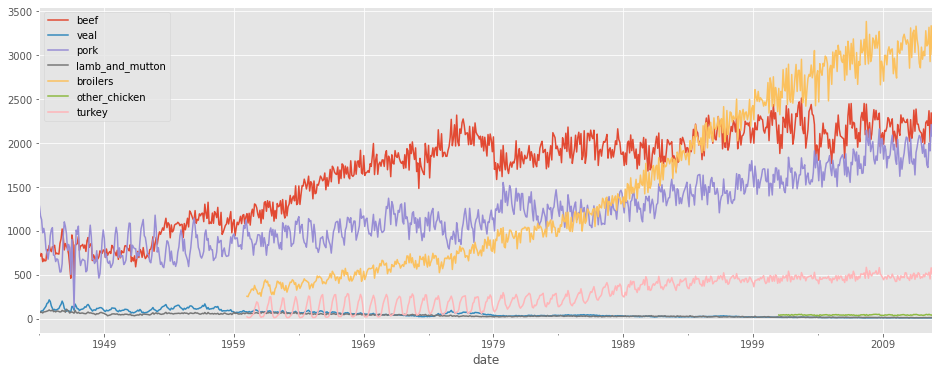

In [3]:
meat.plot(figsize=(16,6))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


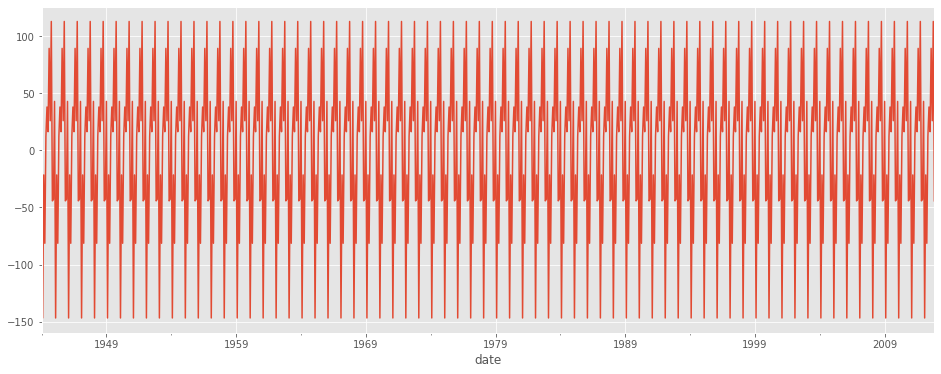

In [4]:
import statsmodels.api as sm 
decomposition = sm.tsa.seasonal_decompose(meat['beef'])
decomposition.seasonal.plot(figsize=(16,6))

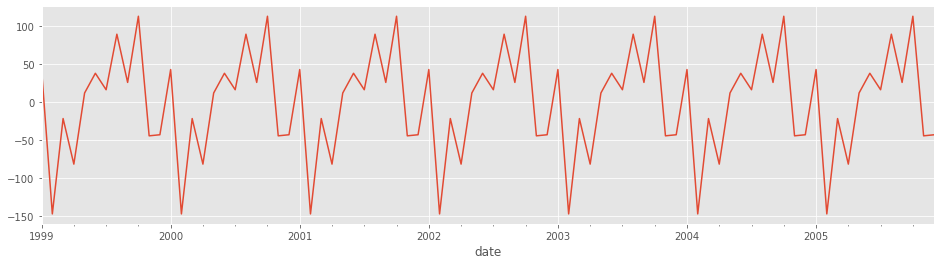

In [5]:
decomposition.seasonal['1999':'2005'].plot(figsize=(16,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45911f6890>,
      dtype=object)

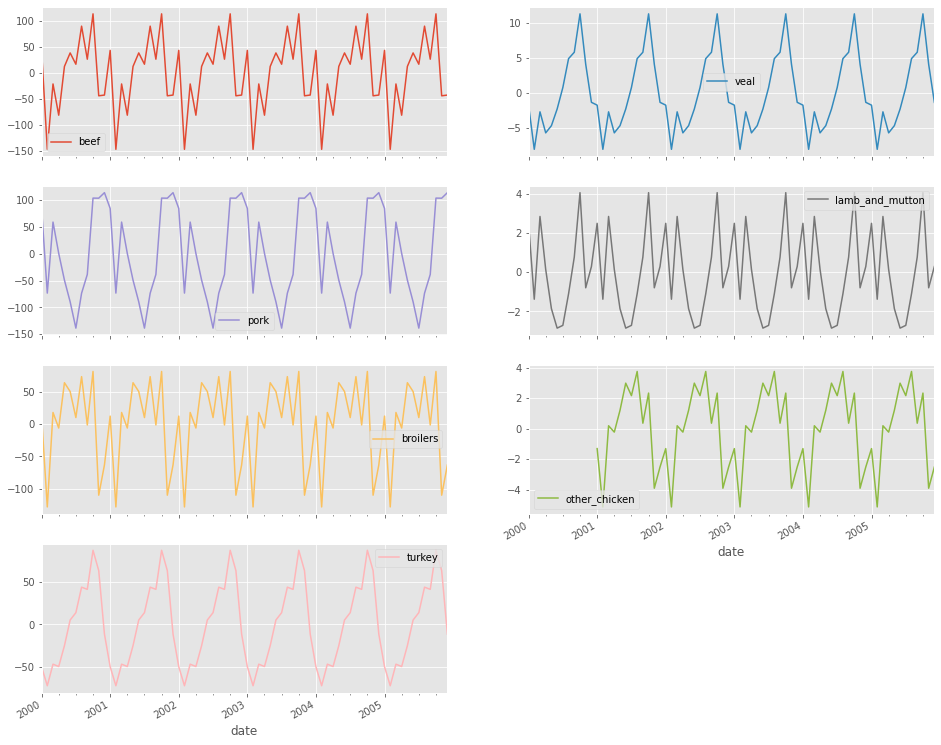

In [6]:
seasonality_dict = {}

for ts in meat.columns:
    decompositions = sm.tsa.seasonal_decompose(meat[ts].dropna())
    seasonality_dict[ts] = decompositions.seasonal

pd.DataFrame(seasonality_dict)["2000":"2005"].plot(subplots=True, layout=(4,2), figsize=(16,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4590c726d0>,
      dtype=object)

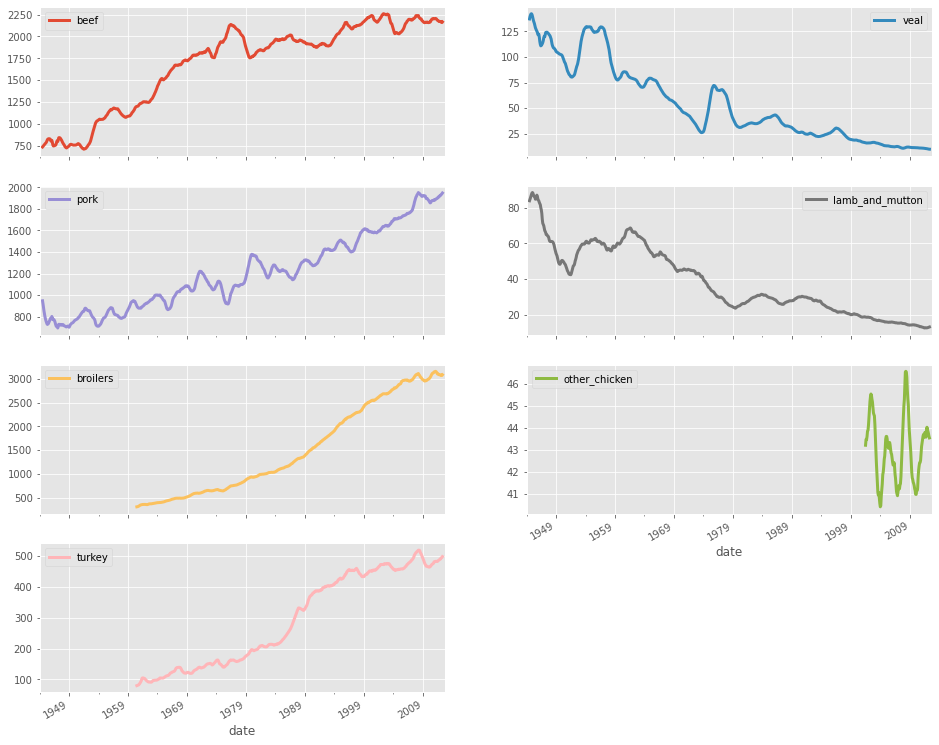

In [7]:
trend_dict = {}

for ts in meat.columns:
    decompositions = sm.tsa.seasonal_decompose(meat[ts].dropna())
    trend_dict[ts] = decompositions.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4,2), figsize=(16,14), linewidth=3)

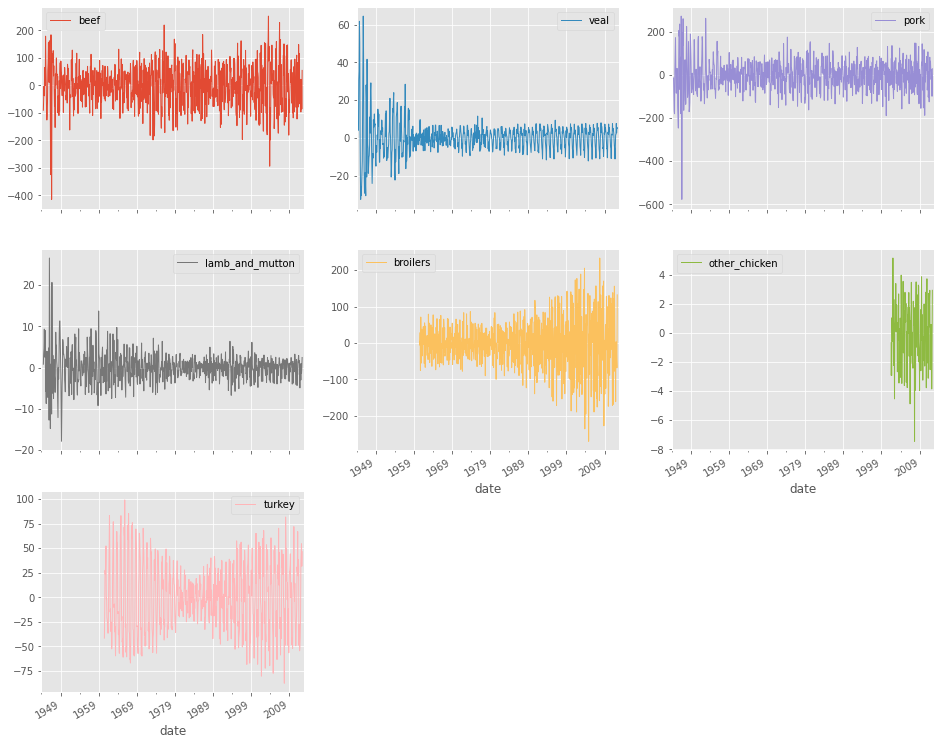

In [8]:
resid_dict = {}

for ts in meat.columns:
    decomposition = sm.tsa.seasonal_decompose(meat[ts].dropna())
    resid_dict[ts] = decomposition.resid

pd.DataFrame(resid_dict).plot(figsize= (16,14),subplots=True, layout=(3, 3), linewidth=1);

### Multiple time series

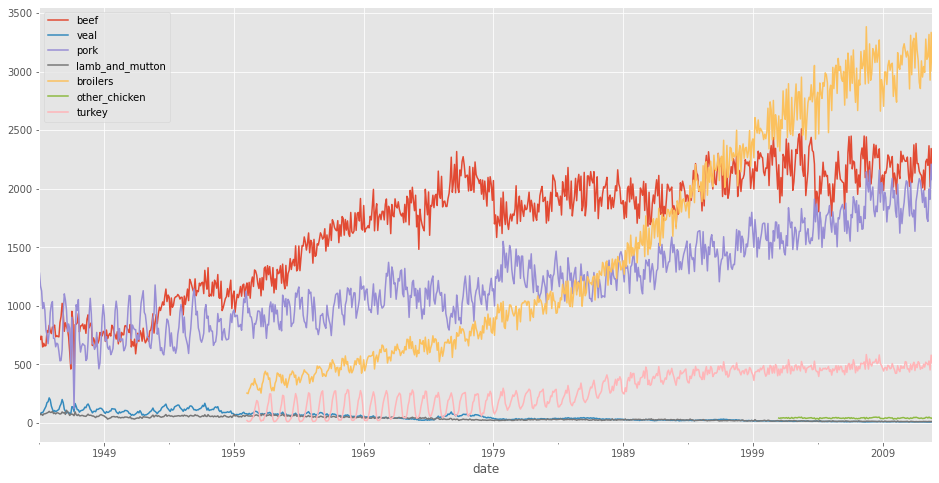

In [9]:
meat.plot(figsize=(16,8))

In [10]:
meat.div(meat.iloc[0]).head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
1944-02-01,0.949401,0.905882,0.913281,0.808989,NaN,NaN,NaN
1944-03-01,0.986684,1.058824,0.881250,0.842697,NaN,NaN,NaN
1944-04-01,0.865513,1.047059,0.764062,0.741573,NaN,NaN,NaN
1944-05-01,0.906791,1.247059,0.803906,0.876404,NaN,NaN,NaN


In [11]:
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


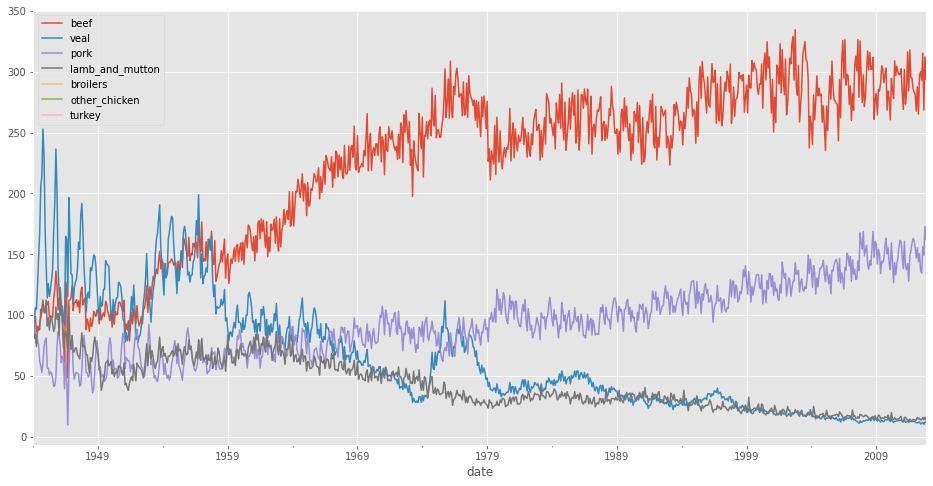

In [12]:
normalized = meat.div(meat.iloc[0]).mul(100)

normalized.plot(figsize=(16,8))

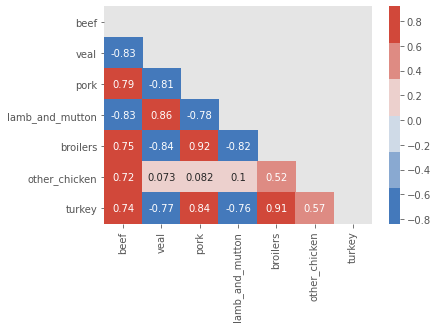

In [13]:
cmap = sns.diverging_palette(250, 15)

matrix = meat.corr(method='pearson')
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, cmap=cmap, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


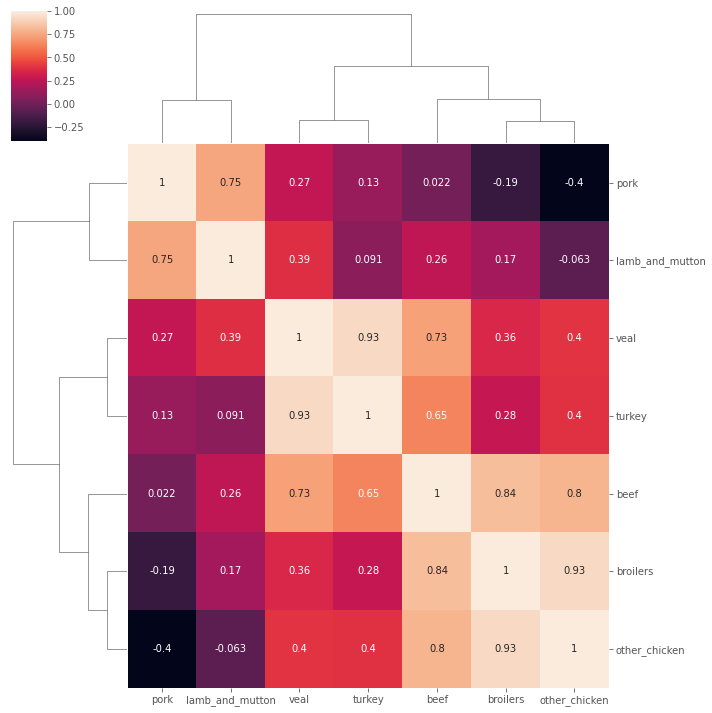

In [14]:
seasonality_dict={ts: sm.tsa.seasonal_decompose(meat[ts].dropna()).seasonal for ts in meat.columns}
seasonality_corr = pd.DataFrame(seasonality_dict).corr()
sns.clustermap(seasonality_corr, annot=True, square=True)